# Data Analysis

## Explore and analyze Spotify audio features

To see the definitions of the the audio features please visit https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [1]:
import pandas as pd
import csv
import ast
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
spotify_data = pd.read_csv("../data/spotify_results_cleaned.csv")

In [3]:
spotify_data

,index,wiki_name,wiki_artist,year,sp_id,sp_name,sp_artist,duration,audio_features,flag
0,0,"""volare (nel blu dipinto di blu)""",domenico modugno,1958,1aSLWs30nitk2RRoEWjS0i,volare (nel blu dipinto di blu) - remastered,domenico modugno,214209.0,"{'danceability': 0.532, 'energy': 0.153, 'key'...",0
1,3,"""witch doctor""",david seville,1958,4kovpzSYYoguJxUXQesQ13,witch doctor,david seville,145360.0,"{'danceability': 0.627, 'energy': 0.624, 'key'...",0
2,4,"""patricia""",perez prado,1958,2bwhOdCOLgQ8v6xStAqnju,patricia,pérez prado,140000.0,"{'danceability': 0.699, 'energy': 0.715, 'key'...",0
3,7,"""tequila""",the champs,1958,5gJKsGij5oGt5H5RSFYXPa,tequila,the champs,135240.0,"{'danceability': 0.671, 'energy': 0.742, 'key'...",0
4,8,"""its all in the game""",tommy edwards,1958,2lmPUdIdzlFH64PWJrw6Zb,its all in the game,tommy edwards,159040.0,"{'danceability': 0.384, 'energy': 0.276, 'key'...",0
...,...,...,...,...,...,...,...,...,...,...
6065,6346,"""things a man oughta know""",lainey wilson,2021,5QS8PNEWbqTEZyQ6e9ZbJf,things a man oughta know,lainey wilson,203373.0,"{'danceability': 0.659, 'energy': 0.683, 'key'...",0
6066,6347,"""throat baby (go baby)""",brs kash,2021,15C4TnrrVdym7UykxQIOTZ,throat baby (go baby) (with dababy & city girl...,brs kash,211609.0,"{'danceability': 0.878, 'energy': 0.475, 'key'...",0
6067,6348,"""tombstone""",rod wave,2021,3zc8VZEpM1onYV4FWGdFvm,tombstone,rod wave,160078.0,"{'danceability': 0.55, 'energy': 0.637, 'key':...",0
6068,6349,"""drinkin beer. talkin god. amen.""",chase rice featuring florida georgia line,2021,1UYfAU2bwgjaM5rIIPQleC,drinkin beer. talkin god. amen. (feat. florida...,chase rice,160839.0,"{'danceability': 0.627, 'energy': 0.678, 'key'...",0


In [4]:
duration = spotify_data['duration']
audio_features = spotify_data['audio_features']
years = spotify_data['year']

In [5]:
audio_features

0       {'danceability': 0.532, 'energy': 0.153, 'key'...
1       {'danceability': 0.627, 'energy': 0.624, 'key'...
2       {'danceability': 0.699, 'energy': 0.715, 'key'...
3       {'danceability': 0.671, 'energy': 0.742, 'key'...
4       {'danceability': 0.384, 'energy': 0.276, 'key'...
                              ...                        
6065    {'danceability': 0.659, 'energy': 0.683, 'key'...
6066    {'danceability': 0.878, 'energy': 0.475, 'key'...
6067    {'danceability': 0.55, 'energy': 0.637, 'key':...
6068    {'danceability': 0.627, 'energy': 0.678, 'key'...
6069    {'danceability': 0.78, 'energy': 0.718, 'key':...
Name: audio_features, Length: 6070, dtype: object

In [6]:
audio_features[0]

"{'danceability': 0.532, 'energy': 0.153, 'key': 10, 'loudness': -11.707, 'mode': 1, 'speechiness': 0.0405, 'acousticness': 0.966, 'instrumentalness': 3.94e-05, 'liveness': 0.333, 'valence': 0.435, 'tempo': 64.52}"

In [7]:
years.unique()

array([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [8]:
# Store data for each audio feature in a separate list
danceability, energy, key, loudness = [],[],[],[]
mode, speechiness, acousticness, instrumentalness = [],[],[],[]
liveness, valence, tempo = [],[],[]

for song in audio_features:
    song_dict = ast.literal_eval(song)
    danceability.append(song_dict['danceability'])
    energy.append(song_dict['energy'])
    key.append(song_dict['key'])
    loudness.append(song_dict['loudness'])
    mode.append(song_dict['mode'])
    speechiness.append(song_dict['speechiness'])
    instrumentalness.append(song_dict['instrumentalness'])
    acousticness.append(song_dict['acousticness'])
    liveness.append(song_dict['liveness'])
    valence.append(song_dict['valence'])
    tempo.append(song_dict['tempo'])

In [9]:
features_df = pd.DataFrame([danceability, energy, key, loudness, mode, speechiness,
                            instrumentalness, acousticness, liveness, valence, tempo]).T
features_df.columns = list(song_dict.keys())
features_df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.532,0.153,10.0,-11.707,1.0,0.0405,0.000039,0.966,0.3330,0.435,64.520
1,0.627,0.624,7.0,-5.659,1.0,0.0482,0.000000,0.726,0.1460,0.897,139.305
2,0.699,0.715,1.0,-5.976,1.0,0.0391,0.415000,0.180,0.0704,0.810,137.373
3,0.671,0.742,5.0,-9.912,1.0,0.0441,0.679000,0.121,0.0601,0.897,89.748
4,0.384,0.276,3.0,-13.527,1.0,0.0295,0.000000,0.038,0.3090,0.654,105.181
5,0.267,0.205,2.0,-13.750,1.0,0.0348,0.002030,0.966,0.1130,0.178,88.584
6,0.461,0.466,11.0,-9.627,1.0,0.0598,0.000028,0.860,0.1350,0.251,128.537
7,0.643,0.617,9.0,-5.006,1.0,0.0801,0.000000,0.823,0.3300,0.881,157.748
8,0.625,0.425,7.0,-9.962,1.0,0.0359,0.000525,0.652,0.1240,0.829,80.024
9,0.408,0.397,9.0,-12.536,1.0,0.0300,0.000000,0.873,0.2800,0.697,72.615


In [10]:
def avg_finder(feature_lst):
    """
    Find annual average for any given audio feature.
    """
    avg_lst = []
    prev_yr = years[0]
    avg = 0
    count = 0
    for yr, val in zip(years, feature_lst):
        if yr != prev_yr:
            avg_lst.append(avg)
            avg = val
            count = 1
            prev_yr = yr
        else:
            avg = (avg * count + val) / (count + 1)
            count += 1
    avg_lst.append(avg)
    return avg_lst

In [11]:
duration_avg = avg_finder(duration)
danceability_avg = avg_finder(danceability)
energy_avg = avg_finder(energy)
key_avg = avg_finder(key)
loudness_avg = avg_finder(loudness)
mode_avg = avg_finder(mode)
speechiness_avg = avg_finder(speechiness)
instrumentalness_avg = avg_finder(instrumentalness)
acousticness_avg = avg_finder(acousticness)
liveness_avg = avg_finder(liveness)
valence_avg = avg_finder(valence)
tempo_avg = avg_finder(tempo)

# Graphs

Descriptions copied from Spotify API reference (https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)

### duration_ms
The duration of the track in milliseconds.

Text(0.5, 0, 'Years')

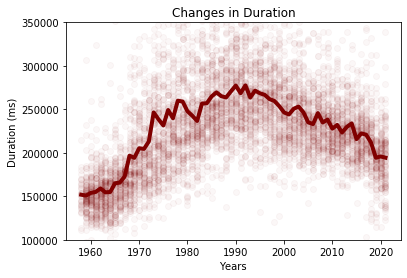

In [12]:
plt.scatter(years,
            duration,
            color='maroon', alpha=0.03)
plt.plot(years.unique(),
            duration_avg,
            color='maroon', alpha=1, linewidth=4)
plt.ylim(100000,350000)
plt.title('Changes in Duration')
plt.ylabel('Duration (ms)')
plt.xlabel('Years')

In [13]:
pd.DataFrame(duration.describe())

,duration
count,6.070000e+03
mean,2.283965e+05
std,6.383626e+04
min,5.211400e+04
25%,1.879200e+05
50%,2.243065e+05
75%,2.593630e+05
max,1.561133e+06


### danceability

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Text(0.5, 0, 'Years')

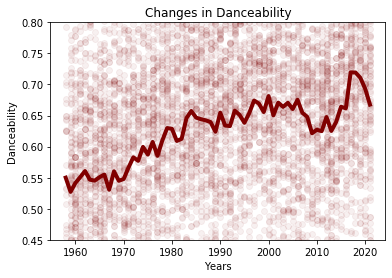

In [14]:
plt.scatter(years,
            danceability,
            color='maroon', alpha=0.06)
plt.plot(years.unique(),
            danceability_avg,
            color='maroon', alpha=1, linewidth=4)
plt.ylim(0.45,0.8)
plt.title('Changes in Danceability')
plt.ylabel('Danceability')
plt.xlabel('Years')

In [15]:
pd.DataFrame(danceability).describe()

,0
count,6070.000000
mean,0.623892
std,0.151407
min,0.000000
25%,0.528250
50%,0.638000
75%,0.731000
max,0.988000


### energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

Text(0.5, 0, 'Years')

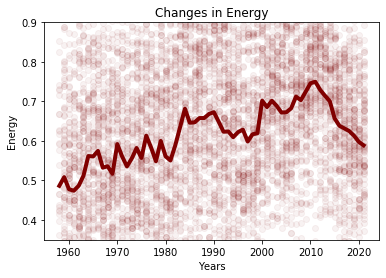

In [16]:
plt.scatter(years,
            energy,
            color='maroon', alpha=0.05)
plt.plot(years.unique(),
            energy_avg,
            color='maroon', alpha=1, linewidth=4)
plt.ylim(0.35,0.9)
plt.title('Changes in Energy')
plt.ylabel('Energy')
plt.xlabel('Years')

In [17]:
pd.DataFrame(energy).describe()

,0
count,6070.000000
mean,0.616779
std,0.191516
min,0.019300
25%,0.479250
50%,0.631000
75%,0.767000
max,0.997000


### loudness

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

Text(0.5, 0, 'Years')

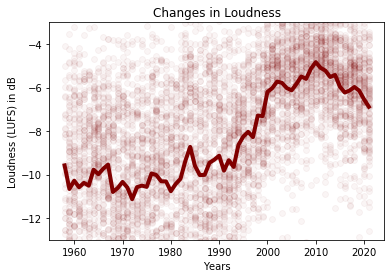

In [18]:
plt.scatter(years,
            loudness,
            color='maroon', alpha=0.04)
plt.plot(years.unique(),
            loudness_avg,
            color='maroon', alpha=1, linewidth=4)
plt.ylim(-13,-3)
plt.title('Changes in Loudness')
plt.ylabel('Loudness (LUFS) in dB')
plt.xlabel('Years')

In [19]:
pd.DataFrame(loudness).describe()

,0
count,6070.000000
mean,-8.438616
std,3.558910
min,-26.456000
25%,-10.739500
50%,-7.867000
75%,-5.659000
max,-0.810000


### speechiness

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

Text(0.5, 0, 'Years')

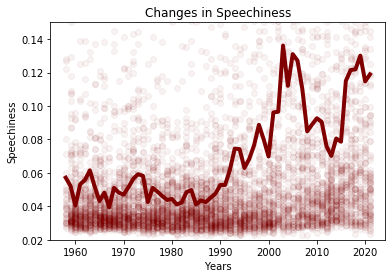

In [20]:
plt.scatter(years,
            speechiness,
            color='maroon', alpha=0.05)
plt.plot(years.unique(),
            speechiness_avg,
            color='maroon', alpha=1, linewidth=4)
plt.ylim(0.02,0.15)
plt.title('Changes in Speechiness')
plt.ylabel('Speechiness')
plt.xlabel('Years')

In [21]:
pd.DataFrame(speechiness).describe()

,0
count,6070.000000
mean,0.070094
std,0.074396
min,0.000000
25%,0.032100
50%,0.041300
75%,0.067500
max,0.911000


### instrumentalness

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Text(0.5, 0, 'Years')

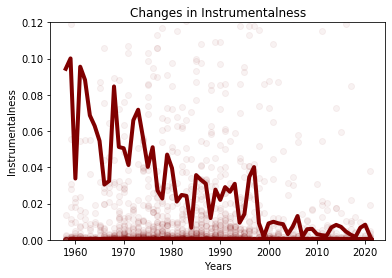

In [22]:
plt.scatter(years,
            instrumentalness,
            color='maroon', alpha=0.05)
plt.plot(years.unique(),
            instrumentalness_avg,
            color='maroon', alpha=1, linewidth=4)
plt.ylim(0,0.12)
plt.title('Changes in Instrumentalness')
plt.ylabel('Instrumentalness')
plt.xlabel('Years')

In [23]:
pd.DataFrame(instrumentalness).describe()

,0
count,6070.000000
mean,0.029016
std,0.129979
min,0.000000
25%,0.000000
50%,0.000003
75%,0.000339
max,0.980000


### acousticness

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Text(0.5, 0, 'Years')

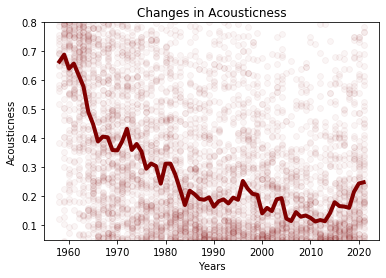

In [24]:
plt.scatter(years,
            acousticness,
            color='maroon', alpha=0.04)
plt.plot(years.unique(),
            acousticness_avg,
            color='maroon', alpha=1, linewidth=4)
plt.ylim(0.05,0.8)
plt.title('Changes in Acousticness')
plt.ylabel('Acousticness')
plt.xlabel('Years')

In [25]:
pd.DataFrame(acousticness).describe()

,0
count,6070.000000
mean,0.272230
std,0.266287
min,0.000017
25%,0.046325
50%,0.177000
75%,0.447750
max,0.991000


### liveness

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

Text(0.5, 0, 'Years')

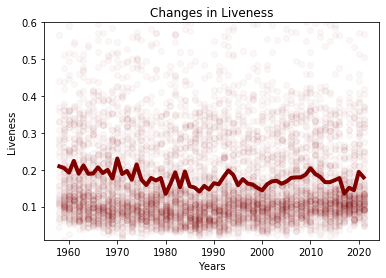

In [26]:
plt.scatter(years,
            liveness,
            color='maroon', alpha=0.03)
plt.plot(years.unique(),
            liveness_avg,
            color='maroon', alpha=1, linewidth=4)
plt.ylim(0.01, 0.6)
plt.title('Changes in Liveness')
plt.ylabel('Liveness')
plt.xlabel('Years')

In [27]:
pd.DataFrame(liveness).describe()

,0
count,6070.000000
mean,0.176202
std,0.145239
min,0.009670
25%,0.086125
50%,0.121000
75%,0.222000
max,0.985000


### valence

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Text(0.5, 0, 'Years')

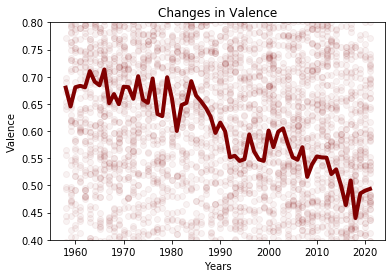

In [28]:
plt.scatter(years,
            valence,
            color='maroon', alpha=0.05)
plt.plot(years.unique(),
            valence_avg,
            color='maroon', alpha=1, linewidth=4)
plt.ylim(0.4,0.8)
plt.title('Changes in Valence')
plt.ylabel('Valence')
plt.xlabel('Years')

In [29]:
pd.DataFrame(valence).describe()

,0
count,6070.000000
mean,0.604938
std,0.239864
min,0.000000
25%,0.419000
50%,0.623500
75%,0.810000
max,0.991000


### tempo

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

Text(0.5, 0, 'Years')

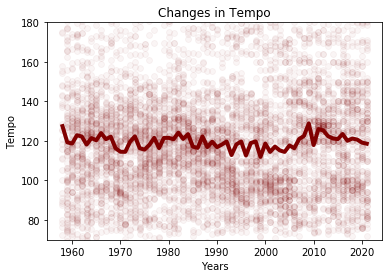

In [30]:
plt.scatter(years,
            tempo,
            color='maroon', alpha=0.04)
plt.plot(years.unique(),
            tempo_avg,
            color='maroon', alpha=1, linewidth=4)
plt.ylim(70,180)
plt.title('Changes in Tempo')
plt.ylabel('Tempo')
plt.xlabel('Years')

In [31]:
pd.DataFrame(tempo).describe()

,0
count,6070.000000
mean,119.480320
std,27.614146
min,0.000000
25%,98.826750
50%,118.068000
75%,134.519750
max,232.473000


# Correlations

In [32]:
corr_df = pd.DataFrame({"year": years, "duration":duration, "danceability": danceability,
                        "energy": energy, "loudness": loudness, "speechiness": speechiness,
                        "instrumentalness": instrumentalness, 'acousticness': acousticness,
                        "liveness": liveness, "valence": valence, "tempo": tempo})

In [33]:
corr_df.corr()

,year,duration,danceability,energy,loudness,speechiness,instrumentalness,acousticness,liveness,valence,tempo
year,1.000000,0.233889,0.281904,0.274526,0.510946,0.299051,-0.167085,-0.460796,-0.064440,-0.264736,0.003822
duration,0.233889,1.000000,0.072584,0.071320,0.005385,0.010020,-0.019807,-0.259549,-0.049775,-0.165101,-0.037567
danceability,0.281904,0.072584,1.000000,0.190909,0.139793,0.229456,-0.015264,-0.323596,-0.129242,0.396681,-0.144779
energy,0.274526,0.071320,0.190909,1.000000,0.686366,0.134734,-0.037235,-0.555534,0.097620,0.366673,0.134565
loudness,0.510946,0.005385,0.139793,0.686366,1.000000,0.168216,-0.152997,-0.407703,0.042505,0.027138,0.066159
speechiness,0.299051,0.010020,0.229456,0.134734,0.168216,1.000000,-0.049879,-0.176708,0.071679,0.017596,0.077613
instrumentalness,-0.167085,-0.019807,-0.015264,-0.037235,-0.152997,-0.049879,1.000000,0.063458,-0.008573,0.047164,0.017189
acousticness,-0.460796,-0.259549,-0.323596,-0.555534,-0.407703,-0.176708,0.063458,1.000000,0.042783,-0.133627,-0.070975
liveness,-0.064440,-0.049775,-0.129242,0.097620,0.042505,0.071679,-0.008573,0.042783,1.000000,0.022634,0.032127
valence,-0.264736,-0.165101,0.396681,0.366673,0.027138,0.017596,0.047164,-0.133627,0.022634,1.000000,0.071309


# Takeaways

1) Danceability, energy, and speechiness have an upward trend.  
2) Valence and acousticness have a downward trend.  
3) Liveness and tempo do not follow a particular trend.  
4) Song durations increased for a while but they have been decreasing in recent years.  
5) Some of the trend lines had pronounced inflection points in 1980 and 2010.